In [40]:
# 📦 Step 1: Import Libraries
# data clearing
import pandas as pd

# open file
file = pd.read_csv('spotify_history.csv')
df = pd.DataFrame(file)
print("🔍 Raw Dataset:\n", df)

# 🧾 Step 2: Basic Info & Summary

print("\n📌 Info:")
print(df.info())

print("\n📈 Description:")
print(df.describe(include='all'))

# step3: Convert to datetime
print("Convert timestamp")
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# step4: Handling Missing Data values in reason_end and reason_start
df['reason_end'] = df['reason_end'].fillna('Unknown')
df['reason_start'] = df['reason_start'].fillna('Unknown')

# step5:Replace 'Not Available' in ts 
df['ts'] = df['ts'].replace('Not Available', pd.NaT)


# 🧽 Step6: Clean Text Columns
df['track_name'] = df['track_name'].str.strip()

# 📌 Step7: Reindex
df.reset_index(drop=True, inplace=True)

# ✅ Final Cleaned Data
print("\n✅ Cleaned DataFrame:\n", df)


# 💾 Optional: Save to CSV
df.to_csv("cleaned_data.csv", index=False)
print("Complete!!!")


🔍 Raw Dataset:
              spotify_track_uri                   ts    platform  ms_played  \
0       2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1       1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2       487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3       5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4       0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   
...                        ...                  ...         ...        ...   
149855  4Fz1WWr5o0OrlIcZxcyZtK  2024-12-15 23:06:19     android       1247   
149856  0qHMhBZqYb99yhX9BHcIkV  2024-12-15 23:06:21     android       1515   
149857  0HHdujGjOZChTrl8lJWEIq  2024-12-15 23:06:22     android       1283   
149858  7peh6LUcdNPcMdrSH4JPsM  2024-12-15 23:06:23     android       1306   
149859  6iGU74CwXuT4XVepjc9Emf  2024-12-15 23:06:25     android       1893   

                                               

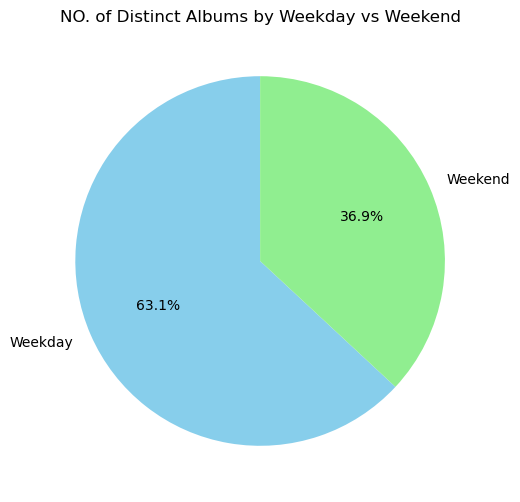

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
# grapy using matplotlib

# Load data
df = pd.read_csv('spotify_history.csv')
df['ts'] = pd.to_datetime(df['ts'])

# Create Weekday_Weekend column
df['Weekday_Weekend'] = df['ts'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Calculate distinct albums count per Weekday/Weekend
distinct_albums_by_daytype = df.groupby('Weekday_Weekend')['album_name'].nunique()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(distinct_albums_by_daytype.values,
        labels=distinct_albums_by_daytype.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightgreen'])
plt.title('NO. of Distinct Albums by Weekday vs Weekend')
plt.show()



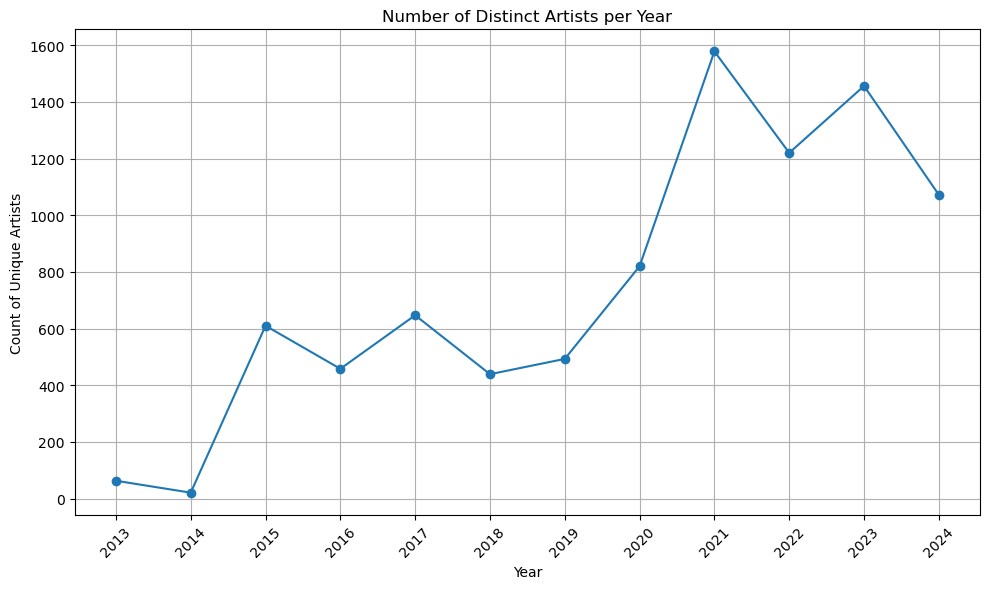

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('spotify_history.csv')

# Convert 'ts' to datetime if not already
df['ts'] = pd.to_datetime(df['ts'])

# Extract the year from the timestamp
df['year'] = df['ts'].dt.year

# Group by year and count distinct artists per year
artist_counts_per_year = df.groupby('year')['artist_name'].nunique()

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(artist_counts_per_year.index, artist_counts_per_year.values, marker='o', linestyle='-')
plt.title('Count of Distinct Artists per Year')
plt.xlabel('Year')
plt.ylabel('Count of Unique Artists')
plt.grid(True)
plt.xticks(artist_counts_per_year.index, rotation=45)  # rotate years if needed
plt.tight_layout()
plt.show()


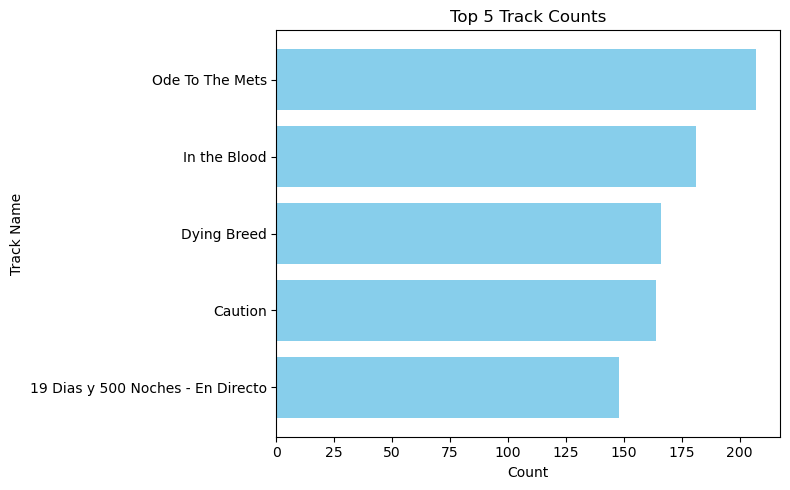

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('spotify_history.csv')

# Count occurrences of each track name
track_counts = df['track_name'].value_counts()

# Get top 5 tracks
top_5_tracks = track_counts.head(5)

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(top_5_tracks.index, top_5_tracks.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Track Name')
plt.title('Top 5 Track Counts')
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

